<a href="https://colab.research.google.com/github/Jesus-Cries/Evidenztheorie/blob/main/Leon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# InsttotalDistances

In [ ]:
!pip install py_dempster_shafer

  Created wheel for py-dempster-shafer: filename=py_dempster_shafer-0.7-py3-none-any.whl size=13378 sha256=812a3d55c06c7dec1a8014da53dbedc58968692e74618a0f958ff2a1ff94a2e1
  Stored in directory: /root/.cache/pip/wheels/79/f7/51/341d0c9d9943d4b868d791af0bfeee79d41f49ca8582ff14f4
Successfully built py-dempster-shafer


# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyds import MassFunction

csv1 = 'https://raw.githubusercontent.com/Jesus-Cries/Evidenztheorie/main/resources/DPE21_1.csv'
csv2 = 'https://raw.githubusercontent.com/Jesus-Cries/Evidenztheorie/main/resources/DPE21_2.csv'

df = pd.read_csv(csv1, sep=";")
df2 = pd.read_csv(csv2, sep=";")

dfs = [df, df2]

# Data Exploration

In [ ]:
df.head()

,t,Brauendistanz(Pixel),AU27,Mund_Nasen_Falte(Pixel/Fenstergroesse),Tonlage
0,0,40,0,22,130.0
1,"0,1",40,1,21,127.0
2,"0,2",42,0,26,130.0
3,"0,3",41,0,24,132.0
4,"0,4",40,0,23,131.0


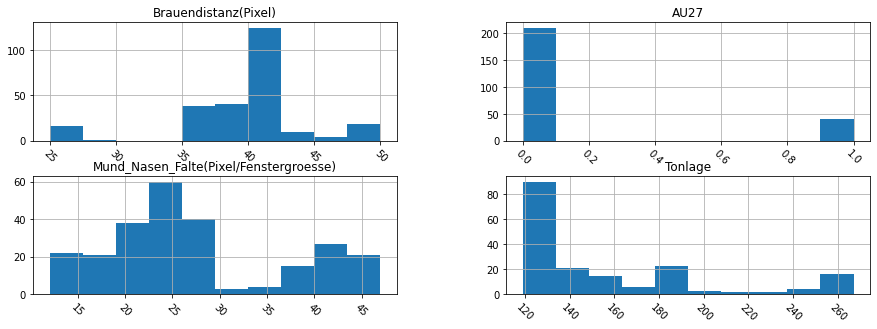

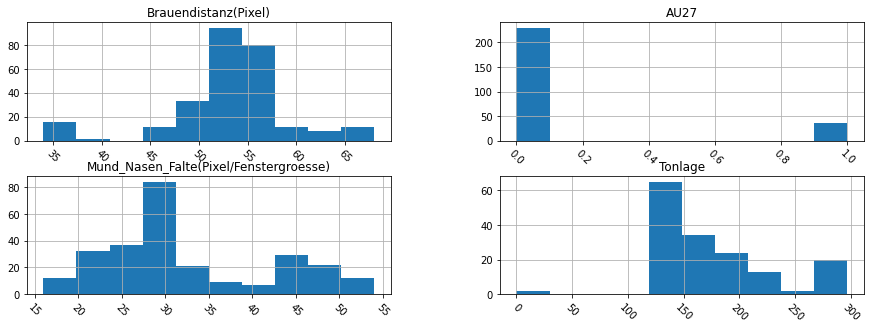

In [ ]:
for dataframe in dfs:
  dataframe.hist(figsize=(15, 5), xrot=-45)
  plt.show()

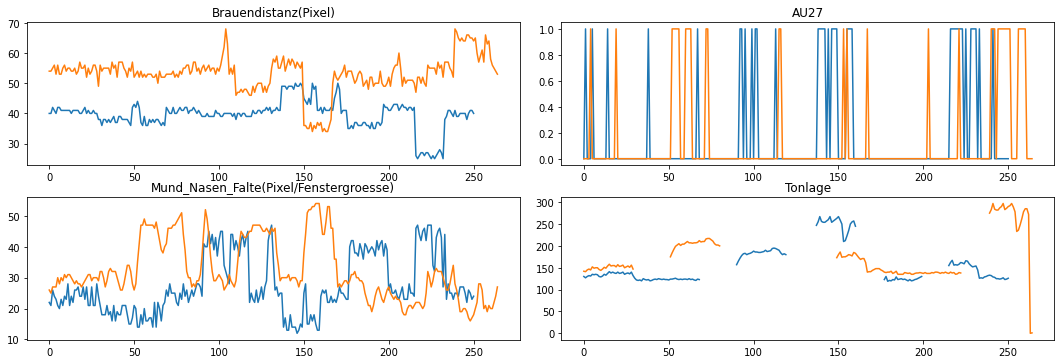

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()

for i, column in enumerate(df.columns):
  if column is not "t":
    row = 0
    if i > 2:
      row = 1
    
    for dataframe in dfs:
      # data_per_tick = dataframe[[column, "t"]].groupby(["t"]).mean()
      # data_per_tick.plot(ax=axes[row][(i-1)%2], legend=False, title=column)
      dataframe[[column]].plot(ax=axes[row][(i-1)%2], legend=False, title=column)

In [ ]:
display(df.select_dtypes(exclude=["object"]).isnull().sum())
display(df2.select_dtypes(exclude=["object"]).isnull().sum())

Brauendistanz(Pixel)                       0
AU27                                       0
Mund_Nasen_Falte(Pixel/Fenstergroesse)     0
Tonlage                                   69
dtype: int64

Brauendistanz(Pixel)                        0
AU27                                        0
Mund_Nasen_Falte(Pixel/Fenstergroesse)      0
Tonlage                                   105
dtype: int64

## Erkenntnisse
1. Bei AU27 handelt es sich um boolsche Werte
2. totalDistancees andere sind numerische Werte
3. Informationen zur Tonlage fehlen teilweise
4. Im zeitlichen Verlauf der numerischen Daten sind eindeutige IntervtotalDistancee zu erkennen

# Features

| Emotion      | Brauendistanz   | AU27 | Mund / Wangenfalte | Tonlage |
|:------------:|:---------------:|:----:|:----------------:|:-------:|
| Angst        | groß            | 1    | klein            | hoch    |
| Überraschung | groß            | 1    | normal           | normal  |
| Wut          | besonders klein | 0    | normal           | normal  |
| Freude       | normal          | 0    | groß             | normal  |
| Ekel         | normal          | 0    | normal           | tief    |
| Traurigkeit  | normal          | 0    | normal           | tief    |

# Testing

In [ ]:
omega = "auwfet"

In [ ]:
# "Ich glaube, die Brauendistanz war groß"
m1 = MassFunction({"au": 0.8, omega: 0.2})
print("m1:", m1)

# "Ich glaube, AU27 wurde erkannt"
m2 = MassFunction({"au": 0.8, omega: 0.2})

m12 = m1 & m2
print("m12:", m12)

# "Ich glaube die Mund / Wangenfalte könnte normal gewesen sein"
m3 = MassFunction({"uwet": 0.3, omega: 0.7})
m123 = m12 & m3
print("m123:", m123)

# "Ich glaube die Tonlage war sehr hoch"
m4 = MassFunction({"a": 0.75, "uwf": 0.2, omega: 0.05})
m1234 = m123 & m4
print("m1234:", m1234)

print("\na:" , m1234.bel("a"))
print("a:" , m1234.pl("a"))

print("Es ist Angst:", m1234.pl("a"))
print("Es ist etwas anderes:", m1234.pl("uwfet"))

m1: {{'u', 'a'}:0.8; {'a', 'e', 'w', 't', 'u', 'f'}:0.2}
m12: {{'u', 'a'}:0.96; {'a', 'e', 'w', 't', 'u', 'f'}:0.04}
m123: {{'u', 'a'}:0.672; {'u'}:0.28800000000000003; {'a', 'e', 'w', 't', 'u', 'f'}:0.028; {'u', 'e', 'w', 't'}:0.012000000000000002}
m1234: {{'a'}:0.6774193548387097; {'u'}:0.26632258064516134; {'u', 'a'}:0.04335483870967743; {'u', 'f', 'w'}:0.007225806451612904; {'u', 'w'}:0.003096774193548388; {'a', 'e', 'w', 't', 'u', 'f'}:0.001806451612903226; {'u', 'e', 'w', 't'}:0.000774193548387097}

a: 0.6774193548387097
a: 0.7225806451612904
Es ist Angst: 0.7225806451612904
Es ist etwas anderes: 0.32258064516129037


# Calculation of probability

In [ ]:
for column in df.columns:
  if column not in ["t", "AU27"]:
    print("\n" + column)
    print("Max:  ", df[column].max())
    print("Mean: ", df[column].mean())
    print("Min:  ", df[column].min())


Brauendistanz(Pixel)
Max:   50
Mean:  39.57370517928287
Min:   25

Mund_Nasen_Falte(Pixel/Fenstergroesse)
Max:   47
Mean:  27.390438247011954
Min:   12

Tonlage
Max:   267.0
Mean:  155.82417582417582
Min:   119.0


In [ ]:
def getProbabilites(columnName, index, debug=False, dfNumber=1): 
  """
  This function takes the value in column columnName and index index.
  It then calculates the probability at which it would classify this value
  into three categories:
  1: High (pMax)
  2: Normal (pMean)
  3: Low (pMin)
  Debugging can be activated by setting debug to True.
  The dataframe can be changed by setting dfNumber to either 1 or 2.
  Returns: pMin, pMean, pMax
  """

  if dfNumber == 1:
    currentDf = df
  elif dfNumber == 2:
    currentDf = df2

  exampleRow = currentDf.iloc[index]

  if pd.isna(exampleRow[columnName]):
    print("Error: Cell contains NaN")
    return -1, -1, -1

  currentValue = exampleRow[columnName]

  max = currentDf[columnName].max()
  mean = currentDf[columnName].mean()
  min = currentDf[columnName].min()

  distToMax = abs(currentValue - max)
  distToMean = abs(currentValue - mean)
  distToMin = abs(currentValue - min)

  if debug:
    debugInformation = pd.DataFrame(columns=["Description", "Low", "Normal", "High"])
    debugInformation = debugInformation.append({"Description": "Boundary", "Low": min, "Normal": mean, "High": max}, ignore_index=True)
    debugInformation = debugInformation.append({"Description": "Distance", "Low": distToMin, "Normal": distToMean, "High": distToMax}, ignore_index=True)
  
  if distToMax == 0:
    pMax = 1
    pMean = 0
    pMin = 0
  elif distToMean == 0:
    pMax = 0
    pMean = 1
    pMin = 0
  elif distToMin == 0:
    pMax = 0
    pMean = 0
    pMin = 1
  else:
    distToMax = 1 / (distToMax ** 2)
    distToMean = 1 / (distToMean ** 2)
    distToMin = 1 / (distToMin ** 2)

    totalDistance = distToMax + distToMean + distToMin

    pMax = distToMax / totalDistance
    pMean = distToMean / totalDistance
    pMin = distToMin / totalDistance

  if debug:
    debugInformation = debugInformation.append({"Description": "Probability", "Low": pMin, "Normal": pMean, "High": pMax}, ignore_index=True)
    print("Current value:", currentValue, "\n")
    display(debugInformation)

  return pMin, pMean, pMax

In [ ]:
dfNumber = 1

In [ ]:
min, mean, max = getProbabilites("Brauendistanz(Pixel)", 144, True, dfNumber)

Current value: 48 



,Description,Low,Normal,High
0,Boundary,25,39.573705,50
1,Distance,23,8.426295,2
2,Probability,0.0071073,0.052953,0.93994


In [ ]:
min, mean, max = getProbabilites("Mund_Nasen_Falte(Pixel/Fenstergroesse)", 12, True, dfNumber)

Current value: 21 



,Description,Low,Normal,High
0,Boundary,12,27.390438,47
1,Distance,9,6.390438,26
2,Probability,0.322239,0.639149,0.0386115


In [ ]:
min, mean, max = getProbabilites("Tonlage", 37, True, dfNumber)

Current value: 122.0 



,Description,Low,Normal,High
0,Boundary,119.000000,155.824176,267.000000
1,Distance,3.000000,33.824176,145.000000
2,Probability,0.991774,0.007802,0.000425


In [ ]:
# INFO: Für AU27 müssen keine Wahrscheinlichkeiten berechnet werden, weil nur die Werte 0 und 1 angenommen werden können
min, mean, max = getProbabilites("AU27", 110, True, dfNumber)

Current value: 0 



,Description,Low,Normal,High
0,Boundary,0,0.163347,1
1,Distance,0,0.163347,1
2,Probability,1,0.000000,0
